In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score, classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.cluster import KMeans, k_means
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from math import sqrt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
import pickle


np.printoptions(formatter={'float_kind':'{:3}'.format})


%matplotlib inline

In [4]:
dataset = pd.read_csv('C:\\Users\ASHE\\Desktop\\Ashe Git Project\\Sales_Record.csv')
dataset 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Age,Gender,...,Vertical_Manager_Alias,General_Seller,Services_Seller,Support_Seller,Product_Seller,How often you order in a year?,Were you satisfied with the last order you made with us?,Would you recommend our services to other people?,Did you find our services value for money?,Current_Status
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,40-49,Female,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,4 Times a Year,Somewhat agree,Somewhat Unlikely,Somewhat disagree,Married with children
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,60-64,Male,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,3 Times a Year,Mostly agree,Somewhat Likely,Entirely disagree,Married with children
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,50-59,Male,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,3 Times a Year,Mostly agree,Mostly Unlikely,Entirely disagree,Married with children
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,50-59,Female,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,1 Times a Year,Somewhat agree,Somewhat Likely,Somewhat disagree,Married without children
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,60-64,Male,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,3 Times a Year,Entirely agree,Very Unlikely,Entirely agree,Married with children
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,18-20,Male,...,REIMAFLA,lheytEN,miljoEU,yteMAEU,milMAIZ,5+ Times a Year,Mostly agree,Mostly Likely,Mostly disagree,"Single, never married"
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,50-59,Male,...,REIMAFLA,lheytEN,miljoEU,yteMAEU,milMAIZ,3 Times a Year,Entirely agree,Very Unlikely,Entirely agree,Married with children
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,26-32,Male,...,REIMAFLA,lheytEN,miljoEU,yteMAEU,milMAIZ,3 Times a Year,Mostly agree,Very Likely,Mostly agree,Living with partner
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,40-49,Male,...,REIMAFLA,lheytEN,miljoEU,yteMAEU,milMAIZ,3 Times a Year,Entirely agree,Very Unlikely,Entirely agree,Married with children


In [5]:
dataset.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Age', 'Gender', 'latitude',
       'longitude', 'Vertical_Manager_Alias', 'General_Seller',
       'Services_Seller', 'Support_Seller', 'Product_Seller',
       'How often you order in a year?',
       'Were you satisfied with the last order you made with us?',
       'Would you recommend our services to other people?',
       'Did you find our services value for money?', 'Current_Status'],
      dtype='object')

In [6]:
fill = ['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Total_Household_Income', 'Age',
       'Gender', 'Total Profit', 'latitude', 'longitude', 'Account_Name',
       'Industry', 'Vertical', 'Segment', 'Store_Manager_Alias',
       'Potential_Account', 'Vertical_Manager_Alias', 'General_Seller',
       'Services_Seller', 'Support_Seller', 'Product_Seller',
       'How often you do you order in a year?',
       'How many hours are you willing to wait to receive feedback on your order?',
       'Were you satisfied with the last order you placed with us?',
       'Would you recommend our services to other people?',
       'Did you find our services value for money?']

for f in fill:
    print(dataset[f].value_counts())
    plt.show()
    

Europe                               2633
Sub-Saharan Africa                   2603
Asia                                 1469
Middle East and North Africa         1264
Central America and the Caribbean    1019
Australia and Oceania                 797
North America                         215
Name: Region, dtype: int64
Lithuania         72
United Kingdom    72
Moldova           71
Seychelles        70
Croatia           70
                  ..
Slovakia          42
Greenland         41
Tajikistan        40
Saint Lucia       39
Mali              35
Name: Country, Length: 185, dtype: int64
Personal Care      888
Household          875
Clothes            872
Baby Food          842
Office Supplies    837
Vegetables         836
Cosmetics          834
Cereal             825
Snacks             816
Meat               798
Fruits             795
Beverages          782
Name: Item Type, dtype: int64
Online     5061
Offline    4939
Name: Sales Channel, dtype: int64
C    2555
H    2503
L    2494
M    

KeyError: 'Total_Household_Income'

In [7]:
dataset.isnull().sum()

Region                                                       0
Country                                                      0
Item Type                                                    0
Sales Channel                                                0
Order Priority                                               0
Order Date                                                   0
Order ID                                                     0
Ship Date                                                    0
Age                                                          0
Gender                                                       0
latitude                                                     0
longitude                                                    0
Vertical_Manager_Alias                                       0
General_Seller                                              10
Services_Seller                                             10
Support_Seller                                         

In [9]:
dataset[dataset['General_Seller'].isnull()]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Age,Gender,...,Vertical_Manager_Alias,General_Seller,Services_Seller,Support_Seller,Product_Seller,How often you order in a year?,Were you satisfied with the last order you made with us?,Would you recommend our services to other people?,Did you find our services value for money?,Current_Status
1403,Asia,Maldives,Snacks,Online,L,1/29/2014,383520972,3/2/2014,65 or older,Male,...,ULLNUDEF,NaN,NaN,NaN,NaN,4 Times a Year,Mostly agree,Mostly Unlikely,Entirely disagree,Married with children
4338,Europe,Norway,Baby Food,Online,L,5/28/2015,235661733,6/25/2015,40-49,Female,...,ULLNUDEF,NaN,NaN,NaN,NaN,4 Times a Year,Entirely disagree,Very Likely,Mostly disagree,Married without children
4339,Middle East and North Africa,Israel,Office Supplies,Online,L,8/16/2011,510794150,9/21/2011,65 or older,Male,...,ULLNUDEF,NaN,NaN,NaN,NaN,4 Times a Year,Mostly agree,Very Likely,Neither agree nor disagree,Married with children
4340,Central America and the Caribbean,Antigua and Barbuda,Cereal,Offline,M,4/25/2012,778414666,5/25/2012,65 or older,Male,...,ULLNUDEF,NaN,NaN,NaN,NaN,4 Times a Year,Entirely agree,Neither agree nor disagree,Somewhat disagree,Married without children
4341,Asia,Turkmenistan,Office Supplies,Offline,C,4/16/2015,472947108,5/16/2015,40-49,Female,...,ULLNUDEF,NaN,NaN,NaN,NaN,1 Times a Year,Somewhat agree,Somewhat Likely,Somewhat disagree,"Single, never married"
4342,Europe,Italy,Vegetables,Online,C,11/1/2011,449127805,11/20/2011,26-32,Male,...,ULLNUDEF,NaN,NaN,NaN,NaN,2 Times a Year,Mostly disagree,Mostly Likely,Mostly agree,Living with partner
4343,Middle East and North Africa,Iran,Clothes,Online,H,3/27/2013,732005584,4/12/2013,50-59,Female,...,ULLNUDEF,NaN,NaN,NaN,NaN,1 Times a Year,Somewhat agree,Somewhat Likely,Somewhat disagree,Divorced
4344,Middle East and North Africa,Tunisia,Meat,Offline,M,9/14/2016,966941773,9/20/2016,21-25,Female,...,ULLNUDEF,NaN,NaN,NaN,NaN,1 Times a Year,Somewhat agree,Somewhat Likely,Somewhat disagree,"Single, never married"
4345,Sub-Saharan Africa,Ethiopia,Personal Care,Online,C,9/22/2016,869610202,10/5/2016,60-64,Male,...,ULLNUDEF,NaN,NaN,NaN,NaN,3 Times a Year,Entirely agree,Very Unlikely,Entirely agree,Married with children
4346,Sub-Saharan Africa,Cape Verde,Office Supplies,Online,C,6/5/2016,675997197,6/25/2016,50-59,Male,...,ULLNUDEF,NaN,NaN,NaN,NaN,5+ Times a Year,Mostly agree,Mostly Likely,Mostly disagree,Divorced


In [12]:
dataset = dataset.dropna(subset = ['General_Seller'])

In [18]:
dataset.isnull().sum()

Region                                                      0
Country                                                     0
Item Type                                                   0
Sales Channel                                               0
Order Priority                                              0
Order Date                                                  0
Order ID                                                    0
Ship Date                                                   0
Age                                                         0
Gender                                                      0
latitude                                                    0
longitude                                                   0
Vertical_Manager_Alias                                      0
General_Seller                                              0
Services_Seller                                             0
Support_Seller                                              0
Product_

In [19]:
dataset = dataset.dropna(subset = ['How often you order in a year?'])

In [20]:
dataset.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Age,Gender,...,Vertical_Manager_Alias,General_Seller,Services_Seller,Support_Seller,Product_Seller,How often you order in a year?,Were you satisfied with the last order you made with us?,Would you recommend our services to other people?,Did you find our services value for money?,Current_Status
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,40-49,Female,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,4 Times a Year,Somewhat agree,Somewhat Unlikely,Somewhat disagree,Married with children
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,60-64,Male,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,3 Times a Year,Mostly agree,Somewhat Likely,Entirely disagree,Married with children
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,50-59,Male,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,3 Times a Year,Mostly agree,Mostly Unlikely,Entirely disagree,Married with children
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,50-59,Female,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,1 Times a Year,Somewhat agree,Somewhat Likely,Somewhat disagree,Married without children
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,60-64,Male,...,MSTADCAS,gcrclab,welheEN,yteMAEN,welMAIZ,3 Times a Year,Entirely agree,Very Unlikely,Entirely agree,Married with children


In [21]:
dataset.shape

(9985, 22)

In [22]:
dataset.isnull().sum()

Region                                                      0
Country                                                     0
Item Type                                                   0
Sales Channel                                               0
Order Priority                                              0
Order Date                                                  0
Order ID                                                    0
Ship Date                                                   0
Age                                                         0
Gender                                                      0
latitude                                                    0
longitude                                                   0
Vertical_Manager_Alias                                      0
General_Seller                                              0
Services_Seller                                             0
Support_Seller                                              0
Product_

In [23]:
for column in dataset:
    unique_values = np.unique(dataset[column])
    no_of_values = len(unique_values)
    if no_of_values <= 10:
        print('The number of values of feature {} is {} -- {}'.format(column, no_of_values, unique_values))
    else:
        print('The number of values of feature {} is {}'.format(column, no_of_values))

The number of values of feature Region is 7 -- ['Asia' 'Australia and Oceania' 'Central America and the Caribbean'
 'Europe' 'Middle East and North Africa' 'North America'
 'Sub-Saharan Africa']
The number of values of feature Country is 185
The number of values of feature Item Type is 12
The number of values of feature Sales Channel is 2 -- ['Offline' 'Online']
The number of values of feature Order Priority is 4 -- ['C' 'H' 'L' 'M']
The number of values of feature Order Date is 2691
The number of values of feature Order ID is 9985
The number of values of feature Ship Date is 2719
The number of values of feature Age is 9 -- ['17 or younger' '18-20' '21-25' '26-32' '33-39' '40-49' '50-59' '60-64'
 '65 or older']
The number of values of feature Gender is 2 -- ['Female' 'Male']
The number of values of feature latitude is 9111
The number of values of feature longitude is 9128
The number of values of feature Vertical_Manager_Alias is 83
The number of values of feature General_Seller is 8 --

In [24]:
dataset.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Age', 'Gender', 'latitude',
       'longitude', 'Vertical_Manager_Alias', 'General_Seller',
       'Services_Seller', 'Support_Seller', 'Product_Seller',
       'How often you order in a year?',
       'Were you satisfied with the last order you made with us?',
       'Would you recommend our services to other people?',
       'Did you find our services value for money?', 'Current_Status'],
      dtype='object')

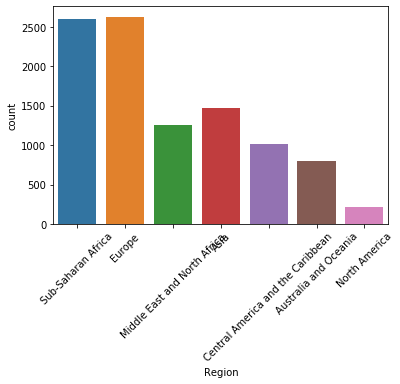

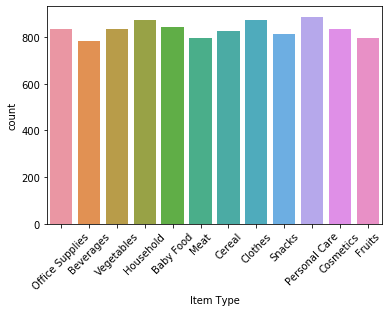

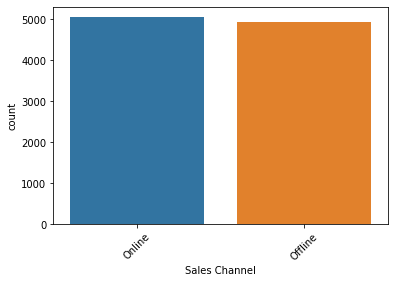

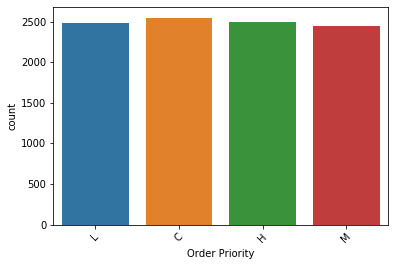

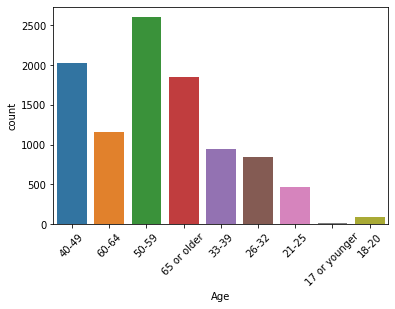

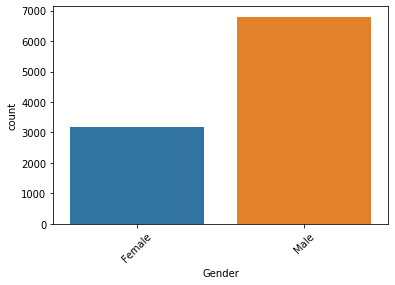

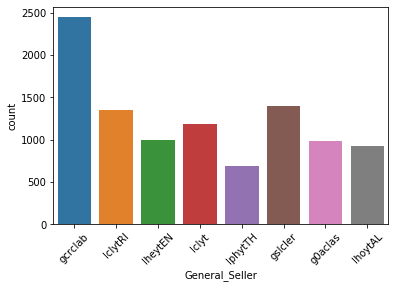

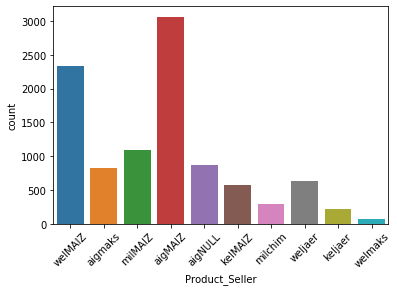

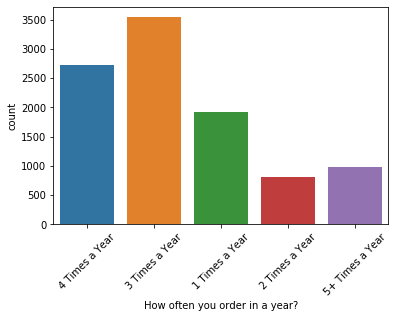

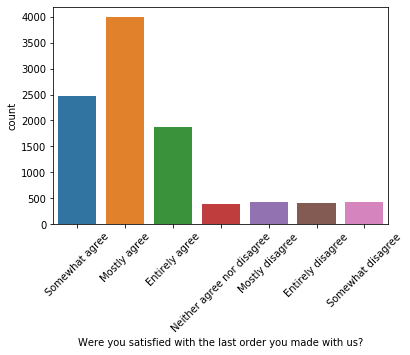

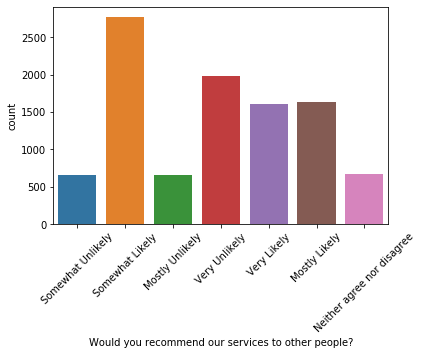

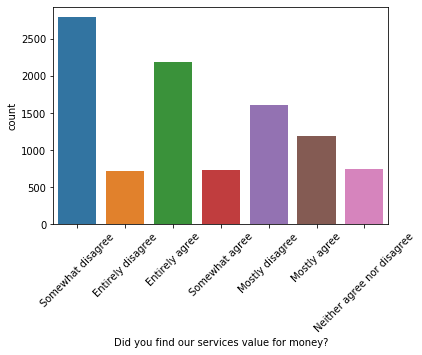

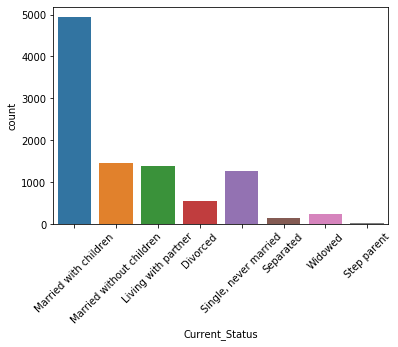

In [27]:
features = ['Region', 'Item Type', 'Sales Channel', 'Order Priority',
        'Age', 'Gender',
        'General_Seller',
       'Product_Seller',
       'How often you order in a year?',
       'Were you satisfied with the last order you made with us?',
       'Would you recommend our services to other people?',
       'Did you find our services value for money?', 'Current_Status']
            
for f in features:
    sns.countplot(x = f, data = dataset)
    plt.xticks(rotation = 45)
    plt.show()

In [64]:
dataset.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Age', 'Gender', 'latitude',
       'longitude', 'Vertical_Manager_Alias', 'General_Seller',
       'Services_Seller', 'Support_Seller', 'Product_Seller',
       'How often you order in a year?',
       'Were you satisfied with the last order you made with us?',
       'Would you recommend our services to other people?',
       'Did you find our services value for money?', 'Current_Status',
       'Order Lat', 'Order Lon', 'Distance from Event'],
      dtype='object')

In [28]:
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist 
    return km

In [29]:
dataset['Order Lat'] = '51.5073'
dataset['Order Lon'] = '0.1657'


haversine_vectorize(dataset['Order Lon'].astype(float), dataset['Order Lat'].astype(float),dataset['longitude'].astype(float),
                   dataset['latitude'].astype(float))


dataset['Distance from Event'] = haversine_vectorize(dataset['Order Lon'].astype(float) ,dataset['Order Lat'].astype(float),dataset['longitude'].astype(float) ,
                   dataset['latitude'].astype(float))

In [33]:
dataset['Distance from Event']

0        34.342502
1        41.376761
2       701.484783
3       176.943287
4        17.216110
           ...    
9995     12.809051
9996     78.436368
9997    514.431514
9998    542.758748
9999     55.855678
Name: Distance from Event, Length: 9985, dtype: float64

In [34]:
dataset.shape

(9985, 25)

In [35]:
new_dataset = dataset[features]

In [38]:
raw_data = pd.get_dummies(new_dataset, columns = features)

In [39]:
raw_data

,Region_Asia,Region_Australia and Oceania,Region_Central America and the Caribbean,Region_Europe,Region_Middle East and North Africa,Region_North America,Region_Sub-Saharan Africa,Item Type_Baby Food,Item Type_Beverages,Item Type_Cereal,...,Did you find our services value for money?_Somewhat agree,Did you find our services value for money?_Somewhat disagree,Current_Status_Divorced,Current_Status_Living with partner,Current_Status_Married with children,Current_Status_Married without children,Current_Status_Separated,"Current_Status_Single, never married",Current_Status_Step parent,Current_Status_Widowed
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9996,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9997,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
raw_data.head()

,Region_Asia,Region_Australia and Oceania,Region_Central America and the Caribbean,Region_Europe,Region_Middle East and North Africa,Region_North America,Region_Sub-Saharan Africa,Item Type_Baby Food,Item Type_Beverages,Item Type_Cereal,...,Did you find our services value for money?_Somewhat agree,Did you find our services value for money?_Somewhat disagree,Current_Status_Divorced,Current_Status_Living with partner,Current_Status_Married with children,Current_Status_Married without children,Current_Status_Separated,"Current_Status_Single, never married",Current_Status_Step parent,Current_Status_Widowed
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
X_train = raw_data.values

In [42]:
kmeans = KMeans(n_clusters = 5, random_state = 453)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=453, tol=0.0001, verbose=0)

In [43]:
kmeans.labels_

array([0, 2, 2, ..., 0, 3, 0])

In [44]:
kmeans.inertia_

78584.52720797366

In [45]:
fit = range(2,20)
inertia = []

for d in fit:
    kmeans = KMeans(n_clusters = d, random_state = 453)
    kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for', d, 'cluster is:', u)

The inertia for 2 cluster is: 88966.20877537294
The inertia for 3 cluster is: 84275.5131813273
The inertia for 4 cluster is: 81084.48598203198
The inertia for 5 cluster is: 78584.52720797366
The inertia for 6 cluster is: 76822.90711373411
The inertia for 7 cluster is: 75809.61044190453
The inertia for 8 cluster is: 74685.06275345066
The inertia for 9 cluster is: 73904.3899021684
The inertia for 10 cluster is: 73207.85740191802
The inertia for 11 cluster is: 72676.79379887845
The inertia for 12 cluster is: 71809.89627690065
The inertia for 13 cluster is: 71407.2679778045
The inertia for 14 cluster is: 70946.21344849911
The inertia for 15 cluster is: 70591.74931832032
The inertia for 16 cluster is: 70366.87639693254
The inertia for 17 cluster is: 70077.2794713744
The inertia for 18 cluster is: 69692.75674757213
The inertia for 19 cluster is: 69470.28543305509


Text(0, 0.5, 'Inertia')

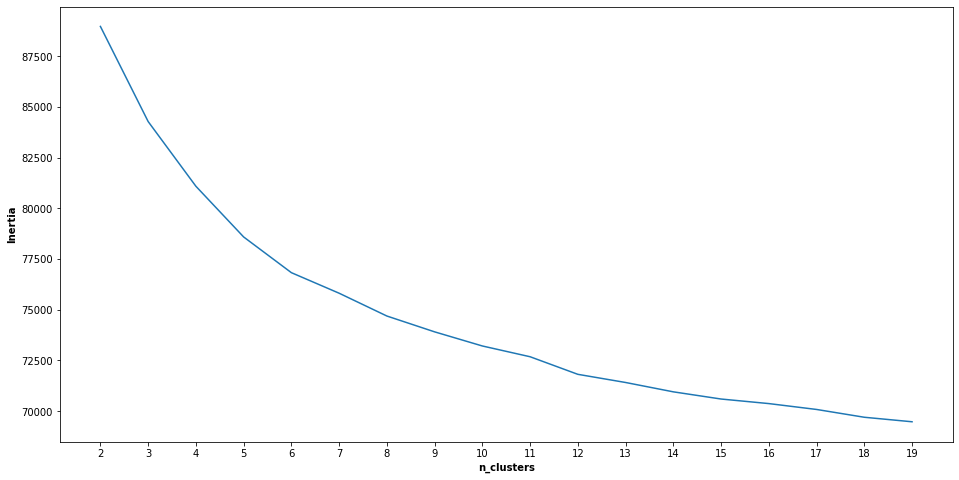

In [47]:

fig, (ax1) = plt.subplots(1, figsize=(16,8))
xx = np.arange(len(fit))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(fit)
plt.xlabel('n_clusters', fontweight = 'bold')
plt.ylabel('Inertia', fontweight = 'bold')

In [48]:
kmeans = KMeans(n_clusters = 5, random_state = 453)
kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

unique, counts = np.unique(predictions, return_counts = True)
counts = counts.reshape(1,5)
countsdlf = pd.DataFrame(counts, columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',])
countsdlf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2663,2066,2930,1469,857


In [49]:
X = X_train
y_num = predictions

<Figure size 432x288 with 0 Axes>

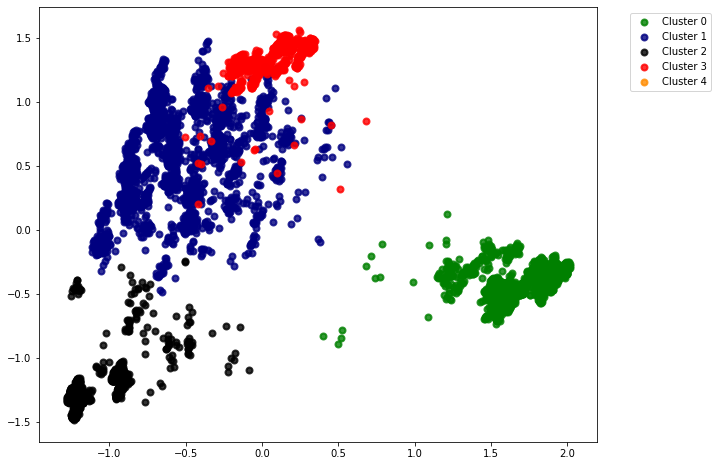

In [51]:
X = X_train
y_num = predictions

target_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4',]

pca = PCA(n_components = 2, random_state = 453)
X_r = pca.fit(X).transform(X)

plt.figure()
plt.figure(figsize = (10, 8))
colors = ['green', 'navy', 'black', 'red', 'darkorange']
lw = 2


for color, i, target_name in zip(colors, [1, 2, 3, 4, 5], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color = color, alpha = 0.8, label = target_name, lw = lw)
    
plt.legend(loc = 'best', scatterpoints = 1, shadow = False)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2, borderaxespad = 0.6)
plt.show()

The total variance is: 9.718576703195822
The 95% explained variance is: 9.23264786803603
The total variance explained by 30 n_components is: 7.19436640738569
The total variance explained by 31 n_components is: 7.283184889419206
The total variance explained by 35 n_components is: 7.629113443245157
The total variance explained by 40 n_components is: 8.042888234898015
The total variance explained by 45 n_components is: 8.434276666333322
The total variance explained by 50 n_components is: 8.793101598851068
The total variance explained by 57 n_components is: 9.222403206172928
The total variance explained by 58 n_components is: 9.272987473066276
The total variance explained by 60 n_components is: 9.36864820195856
The total variance explained by 70 n_components is: 9.684995846503758


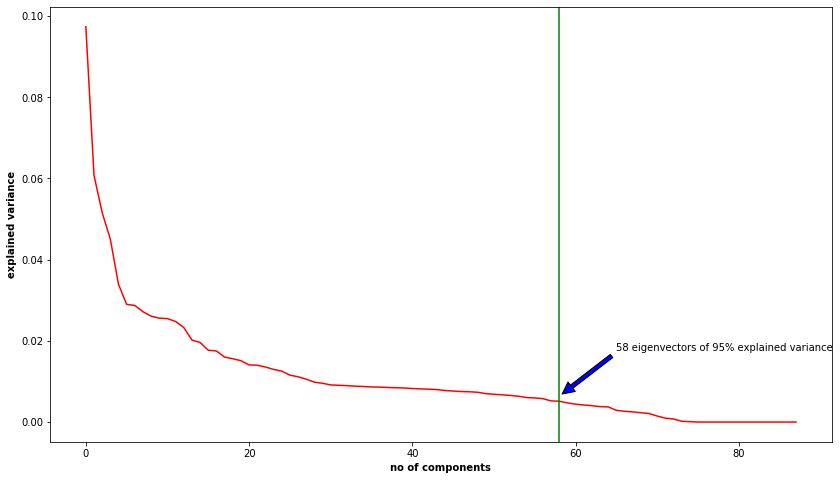

In [62]:
n_components = X.shape[1]
fit = range(2,20)

pca = PCA(n_components = n_components, random_state = 453)
X_r = pca.fit(X).transform(X)    

total_variance = sum(pca.explained_variance_)
print('The total variance is:', total_variance)
var_95 = total_variance * 0.95
print('The 95% explained variance is:', var_95)

a = zip(range(0, n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns = ['N_components', 'Explained Variance'])

print('The total variance explained by 30 n_components is:', sum(a['Explained Variance'][0:30]))
print('The total variance explained by 31 n_components is:', sum(a['Explained Variance'][0:31]))
print('The total variance explained by 35 n_components is:', sum(a['Explained Variance'][0:35]))
print('The total variance explained by 40 n_components is:', sum(a['Explained Variance'][0:40]))
print('The total variance explained by 45 n_components is:', sum(a['Explained Variance'][0:45]))
print('The total variance explained by 50 n_components is:', sum(a['Explained Variance'][0:50]))
print('The total variance explained by 57 n_components is:', sum(a['Explained Variance'][0:57]))
print('The total variance explained by 58 n_components is:', sum(a['Explained Variance'][0:58]))
print('The total variance explained by 60 n_components is:', sum(a['Explained Variance'][0:60]))
print('The total variance explained by 70 n_components is:', sum(a['Explained Variance'][0:70]))
plt.figure(figsize=(14,8))
plt.plot(pca.explained_variance_ratio_, color = 'red')
plt.xlabel('no of components', fontweight = 'bold')
plt.ylabel('explained variance', fontweight = 'bold')

plt.axvline(58, label = '95% variance explained', color = 'green')

plt.annotate('58 eigenvectors of 95% explained variance', xy=(58, pca.explained_variance_ratio_[53]), xytext=(65, pca.explained_variance_ratio_[15]), arrowprops=dict(facecolor = 'blue', shrink = 0.05))
plt.show()

In [53]:
X.shape[1]

88

In [54]:
pca.explained_variance_

array([9.46505141e-01, 5.90835699e-01, 5.01315750e-01, 4.37912458e-01,
       3.29819660e-01, 2.81712014e-01, 2.79076574e-01, 2.64112456e-01,
       2.53373757e-01, 2.48703161e-01, 2.47633625e-01, 2.40638387e-01,
       2.26199938e-01, 1.96304559e-01, 1.90448668e-01, 1.71908878e-01,
       1.70125571e-01, 1.55429556e-01, 1.51556646e-01, 1.46884981e-01,
       1.36720633e-01, 1.35979050e-01, 1.31849563e-01, 1.25955582e-01,
       1.21891316e-01, 1.12226938e-01, 1.08400123e-01, 1.02637952e-01,
       9.54124269e-02, 9.27953428e-02, 8.88184820e-02, 8.78832558e-02,
       8.71187933e-02, 8.58234306e-02, 8.51030742e-02, 8.39251365e-02,
       8.35969800e-02, 8.26459774e-02, 8.20887244e-02, 8.15179734e-02,
       8.01932678e-02, 7.94213353e-02, 7.85766909e-02, 7.77076561e-02,
       7.54894813e-02, 7.41570114e-02, 7.29880918e-02, 7.24539184e-02,
       7.12726470e-02, 6.79532640e-02, 6.65010334e-02, 6.52550958e-02,
       6.36525081e-02, 6.17695455e-02, 5.85663065e-02, 5.76191261e-02,
      

The inertia for 2 cluster is: 84519.55967478159
The inertia for 3 cluster is: 79829.19166896895
The inertia for 4 cluster is: 76638.95676967262
The inertia for 5 cluster is: 73978.18341460732
The inertia for 6 cluster is: 72588.17657052573
The inertia for 7 cluster is: 71460.08824330813
The inertia for 8 cluster is: 70496.3263987915
The inertia for 9 cluster is: 69609.73139999309
The inertia for 10 cluster is: 68822.74175290865
The inertia for 11 cluster is: 68117.0754816462
The inertia for 12 cluster is: 67652.58552918278
The inertia for 13 cluster is: 67142.61164193749
The inertia for 14 cluster is: 66490.63032409613
The inertia for 15 cluster is: 66328.1698944584
The inertia for 16 cluster is: 65929.54458138619
The inertia for 17 cluster is: 65362.419162485916
The inertia for 18 cluster is: 65041.55298106046
The inertia for 19 cluster is: 64810.33488769602


Text(0, 0.5, 'Inertia')

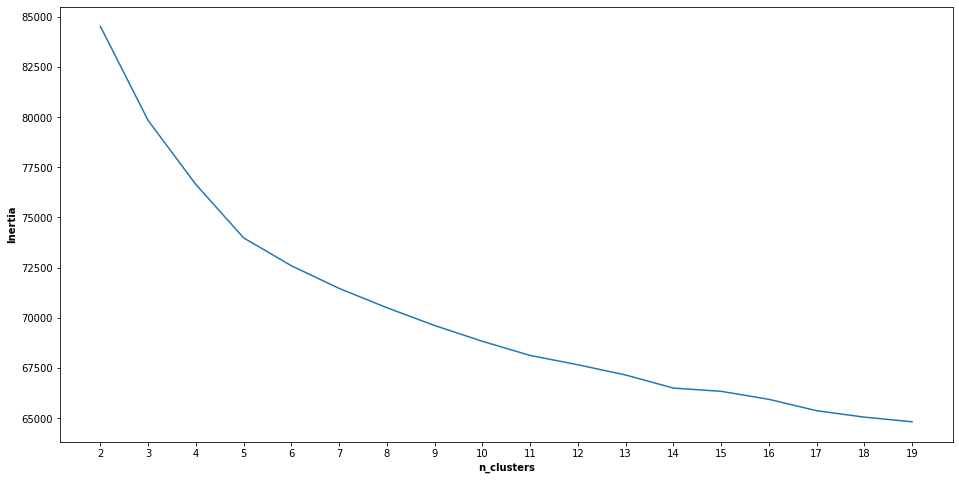

In [63]:
pca = PCA(n_components = 58, random_state = 453)
X_r = pca.fit(X).transform(X)    

dream = range(2,20)
inertia = []

for d in dream:
    kmeans = KMeans(n_clusters = d, random_state = 453)
    kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for', d, 'cluster is:', u)
fig, (ax1) = plt.subplots(1, figsize=(16,8))
xx = np.arange(len(dream))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(dream)
plt.xlabel('n_clusters', fontweight = 'bold')
plt.ylabel('Inertia', fontweight = 'bold')

In [65]:
dataset.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Age', 'Gender', 'latitude',
       'longitude', 'Vertical_Manager_Alias', 'General_Seller',
       'Services_Seller', 'Support_Seller', 'Product_Seller',
       'How often you order in a year?',
       'Were you satisfied with the last order you made with us?',
       'Would you recommend our services to other people?',
       'Did you find our services value for money?', 'Current_Status',
       'Order Lat', 'Order Lon', 'Distance from Event'],
      dtype='object')